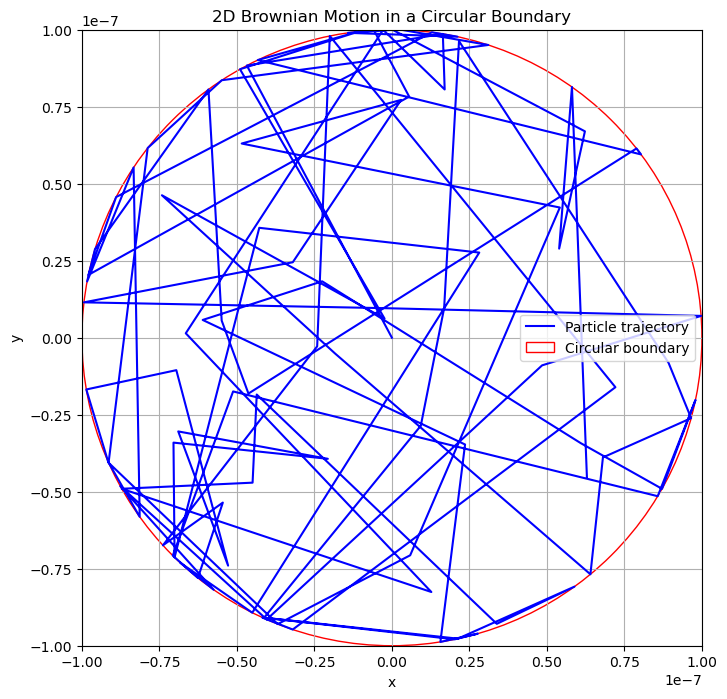

In [107]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Class to simulate Brownian motion in 2D isotropic liquid with circular reflecting boundary
class BrownianMotion2D:
    def __init__(self, radius, temperature, viscosity, particle_radius):
        # Initialize boundary radius, temperature, viscosity, and particle radius
        self.radius = radius
        self.temperature = temperature
        self.viscosity = viscosity
        self.particle_radius = particle_radius
        
        # Boltzmann constant
        k_B = 1.38e-23
        
        # Calculate diffusion coefficient using the Stokes-Einstein relation
        self.diffusion_coeff = k_B * temperature / (6 * np.pi * viscosity * particle_radius)
        
    def simulate_motion(self, n_steps=10000, dt=0.01):
        # Initialize arrays to store the particle's positions
        x_positions = np.zeros(n_steps)
        y_positions = np.zeros(n_steps)
        
        # Initial position of the particle at the center of the boundary
        x_positions[0], y_positions[0] = 0, 0
        
        # Simulation loop
        for i in range(1, n_steps):
            # Generate random displacements along each axis
            x_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            y_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            
            # Calculate new positions
            new_x_position = x_positions[i - 1] + x_step
            new_y_position = y_positions[i - 1] + y_step
            
            # Calculate the distance from the origin
            distance_from_origin = np.sqrt(new_x_position**2 + new_y_position**2)
            
            # Check if the new position is within the circular boundary
            if distance_from_origin <= self.radius:
                # Update positions if within the boundary
                x_positions[i] = new_x_position
                y_positions[i] = new_y_position
            else:
                # Reflect the motion if the new position is outside the boundary
                reflection_angle = np.arctan2(new_y_position, new_x_position)
                reflection_vector = np.array([np.cos(reflection_angle), np.sin(reflection_angle)])
                
                # Calculate the reflected position
                reflection_point = reflection_vector * self.radius
                
                # Update positions with reflected point
                x_positions[i] = reflection_point[0]
                y_positions[i] = reflection_point[1]
        
        # Return arrays of positions
        return x_positions, y_positions
    
    def plot_trajectory(self, x_positions, y_positions):
        # Plot the particle's trajectory
        plt.figure(figsize=(8, 8))
        plt.plot(x_positions, y_positions, 'b-', label='Particle trajectory')
        
        # Plot the circular boundary
        circle = plt.Circle((0, 0), self.radius, color='r', fill=False, label='Circular boundary')
        plt.gca().add_artist(circle)
        
        # Set plot properties
        plt.xlim([-self.radius, self.radius])
        plt.ylim([-self.radius, self.radius])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('2D Brownian Motion in a Circular Boundary')
        plt.legend()
        plt.grid(True)
        plt.show()

# Parameters for the simulation
boundary_radius = 1e-7 # Radius of the circular boundary in meters
temperature = 300  # Temperature in Kelvin
viscosity = 0.001  # Viscosity in Pa.s (e.g., water at room temperature)
particle_radius = 1e-6  # Particle radius in meters
n_steps = 100  # Number of steps in the simulation
dt = 0.01  # Time step in seconds

# Create an instance of the BrownianMotion2D class
particle = BrownianMotion2D(boundary_radius, temperature, viscosity, particle_radius)

# Simulate the particle's motion
x_positions, y_positions = particle.simulate_motion(n_steps, dt)

# Plot the particle's trajectory
particle.plot_trajectory(x_positions, y_positions)


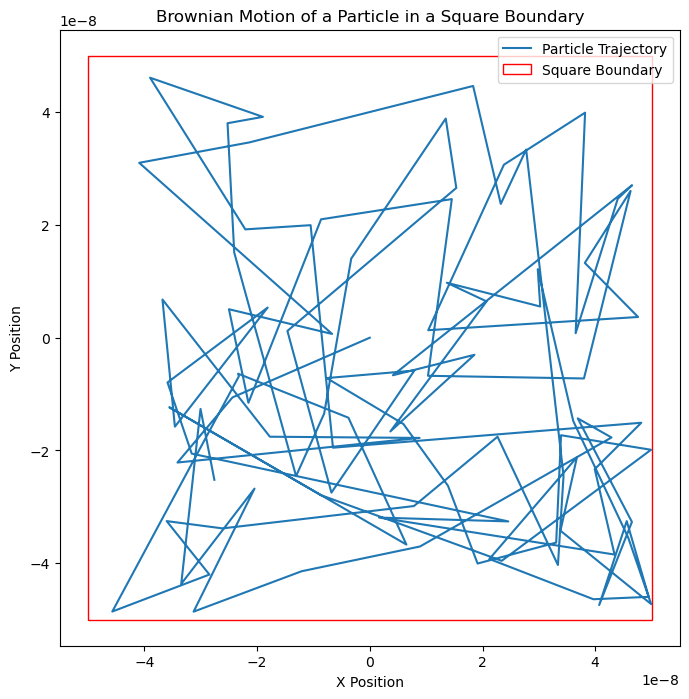

In [83]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate Brownian motion of a particle in 2D within a square boundary
def simulate_brownian_motion_square_boundary(boundary_size, n_steps, dt, viscosity, temperature, particle_radius):
    # Boltzmann constant
    k_B = 1.38e-23
    
    # Calculate the diffusion coefficient using the Stokes-Einstein relation
    diffusion_coefficient = k_B * temperature / (6 * np.pi * viscosity * particle_radius)
    
    # Initialize arrays to store the particle's positions
    x_positions = np.zeros(n_steps)
    y_positions = np.zeros(n_steps)
    
    # Initial position of the particle (center of the square)
    x_positions[0] = 0
    y_positions[0] = 0
    
    # Half-size of the square boundary
    half_size = boundary_size / 2
    
    # Simulation loop
    for i in range(1, n_steps):
        # Generate random displacements along x and y axes
        x_step = np.random.normal(0, np.sqrt(2 * diffusion_coefficient * dt))
        y_step = np.random.normal(0, np.sqrt(2 * diffusion_coefficient * dt))
        
        # Calculate potential new positions
        new_x_position = x_positions[i - 1] + x_step
        new_y_position = y_positions[i - 1] + y_step
        
        # Check and reflect if the particle goes beyond the square boundary along the x-axis
        if abs(new_x_position) > half_size:
            # Calculate the distance the particle has moved beyond the boundary
            excess_distance_x = abs(new_x_position) - half_size
            # Reflect the particle back inside the boundary
            x_positions[i] = np.sign(new_x_position) * (half_size - excess_distance_x)
        else:
            # Update the x position without reflection
            x_positions[i] = new_x_position
        
        # Check and reflect if the particle goes beyond the square boundary along the y-axis
        if abs(new_y_position) > half_size:
            # Calculate the distance the particle has moved beyond the boundary
            excess_distance_y = abs(new_y_position) - half_size
            # Reflect the particle back inside the boundary
            y_positions[i] = np.sign(new_y_position) * (half_size - excess_distance_y)
        else:
            # Update the y position without reflection
            y_positions[i] = new_y_position
    
    # Plot the particle's trajectory within the square boundary
    plt.figure(figsize=(8, 8))
    plt.plot(x_positions, y_positions, label='Particle Trajectory')
    plt.gca().add_patch(plt.Rectangle((-half_size, -half_size), boundary_size, boundary_size, edgecolor='r', facecolor='none', label='Square Boundary'))
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Brownian Motion of a Particle in a Square Boundary')
    plt.axis('equal')
    plt.legend()
    plt.show()
    
# Parameters for the simulation
boundary_size = 1e-7  # Size of the square boundary (side length)
n_steps = 100  # Number of steps in the simulation
dt = 0.01  # Time step in seconds
viscosity = 0.01  # Viscosity of the isotropic liquid in Pa.s
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters

# Simulate the Brownian motion of a single particle in 2D within the square boundary
simulate_brownian_motion_square_boundary(boundary_size, n_steps, dt, viscosity, temperature, particle_radius)


Absorbing boundaries


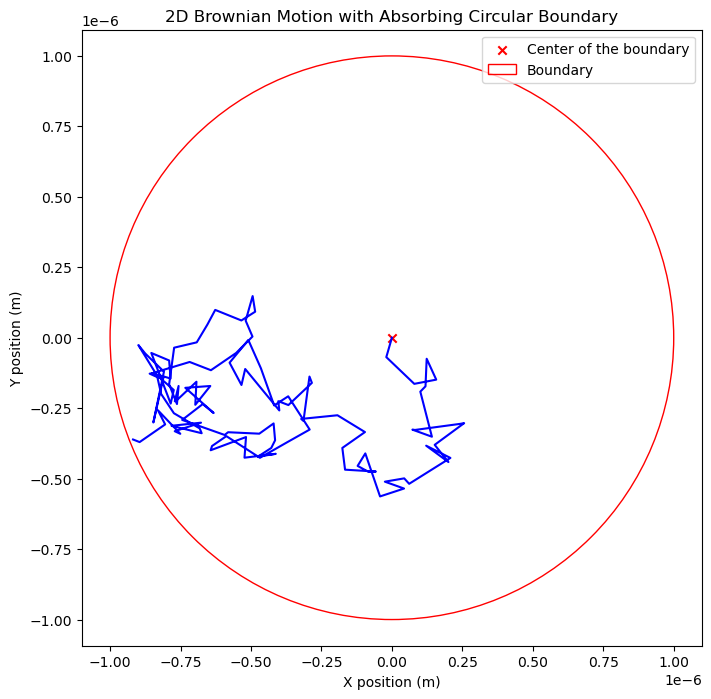

In [111]:
import numpy as np
import matplotlib.pyplot as plt

class BrownianMotionWithAbsorbingBoundary:
    def __init__(self, viscosity, temperature, particle_radius, boundary_radius):
        # Initialize the parameters
        self.viscosity = viscosity
        self.temperature = temperature
        self.particle_radius = particle_radius
        self.boundary_radius = boundary_radius
        
        # Boltzmann constant
        k_B = 1.38e-23
        
        # Calculate the diffusion coefficient using the Stokes-Einstein relation
        self.diffusion_coeff = k_B * temperature / (6 * np.pi * viscosity * particle_radius)
    
    def simulate_motion(self, n_steps=10000, dt=0.01):
        # Initialize the particle's position
        x = 0
        y = 0
        
        # Initialize lists to store positions
        x_positions = [x]
        y_positions = [y]
        
        # Simulation loop
        for _ in range(n_steps):
            # Generate random displacements along x and y axes
            x_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            y_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            
            # Update positions
            x += x_step
            y += y_step
            
            # Check if the particle is outside the circular boundary
            if np.sqrt(x ** 2 + y ** 2) >= self.boundary_radius:
                # If the particle reaches or crosses the boundary, stop the simulation
                break
            
            # Store the new positions
            x_positions.append(x)
            y_positions.append(y)
        
        # Return the positions
        return x_positions, y_positions

# Parameters for the simulation
viscosity = 0.001  # Viscosity in Pa.s (e.g., water)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters
boundary_radius = 10e-7 # Radius of the circular boundary in meters
dt = 0.01  # Time step in seconds
n_steps = 10000  # Number of steps in the simulation

# Create an instance of the BrownianMotionWithAbsorbingBoundary class
brownian_sim = BrownianMotionWithAbsorbingBoundary(viscosity, temperature, particle_radius, boundary_radius)

# Simulate the motion of the particle
x_positions, y_positions = brownian_sim.simulate_motion(n_steps, dt)

# Plot the particle's trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, color='b')
plt.scatter(0, 0, color='r', marker='x', label='Center of the boundary')
plt.gca().add_patch(plt.Circle((0, 0), boundary_radius, color='r', fill=False, label='Boundary'))
plt.title('2D Brownian Motion with Absorbing Circular Boundary')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.legend()
plt.axis('equal')
plt.show()


square boundries

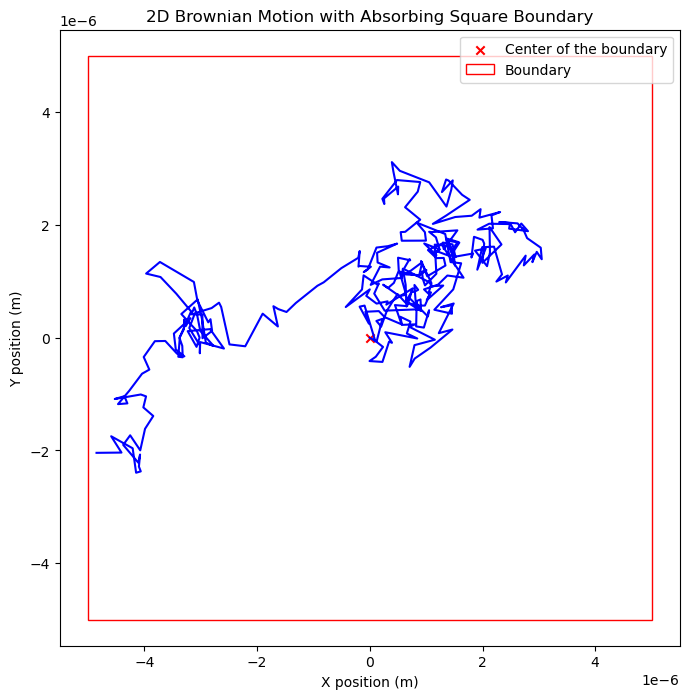

In [115]:
import numpy as np
import matplotlib.pyplot as plt

class BrownianMotionWithAbsorbingSquareBoundary:
    def __init__(self, viscosity, temperature, particle_radius, boundary_length):
        # Initialize the parameters
        self.viscosity = viscosity
        self.temperature = temperature
        self.particle_radius = particle_radius
        self.boundary_length = boundary_length
        
        # Boltzmann constant
        k_B = 1.38e-23
        
        # Calculate the diffusion coefficient using the Stokes-Einstein relation
        self.diffusion_coeff = k_B * temperature / (6 * np.pi * viscosity * particle_radius)
    
    def simulate_motion(self, n_steps=10000, dt=0.01):
        # Initialize the particle's position
        x = 0
        y = 0
        
        # Initialize lists to store positions
        x_positions = [x]
        y_positions = [y]
        
        # Simulation loop
        for _ in range(n_steps):
            # Generate random displacements along x and y axes
            x_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            y_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            
            # Update positions
            x += x_step
            y += y_step
            
            # Check if the particle is outside the square boundary
            if abs(x) >= self.boundary_length / 2 or abs(y) >= self.boundary_length / 2:
                # If the particle reaches or crosses the boundary, stop the simulation
                break
            
            # Store the new positions
            x_positions.append(x)
            y_positions.append(y)
        
        # Return the positions
        return x_positions, y_positions

# Parameters for the simulation
viscosity = 0.001  # Viscosity in Pa.s (e.g., water)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-7  # Particle radius in meters
boundary_length = 10e-6  # Length of the square boundary in meters
dt = 0.01  # Time step in seconds
n_steps = 10000  # Number of steps in the simulation

# Create an instance of the BrownianMotionWithAbsorbingSquareBoundary class
brownian_sim = BrownianMotionWithAbsorbingSquareBoundary(viscosity, temperature, particle_radius, boundary_length)

# Simulate the motion of the particle
x_positions, y_positions = brownian_sim.simulate_motion(n_steps, dt)

# Plot the particle's trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, color='b')
plt.scatter(0, 0, color='r', marker='x', label='Center of the boundary')
plt.gca().add_patch(plt.Rectangle((-boundary_length/2, -boundary_length/2), boundary_length, boundary_length, edgecolor='r', fill=False, label='Boundary'))
plt.title('2D Brownian Motion with Absorbing Square Boundary')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.legend()
plt.axis('equal')
plt.show()


lattice traps

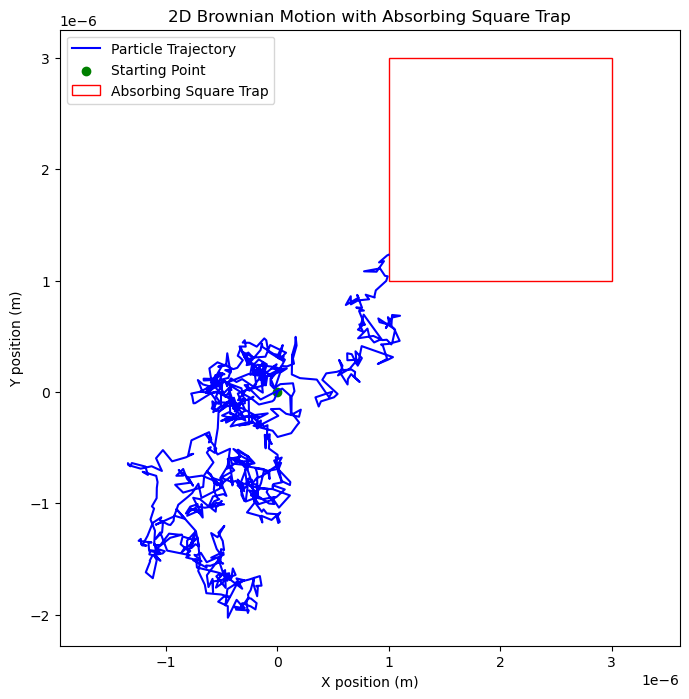

In [127]:
import numpy as np
import matplotlib.pyplot as plt

class BrownianMotionWithAbsorbingSquareTrap:
    def __init__(self, viscosity, temperature, particle_radius, trap_center, trap_size):
        # Initialize the parameters
        self.viscosity = viscosity
        self.temperature = temperature
        self.particle_radius = particle_radius
        self.trap_center = trap_center  # (x, y) coordinates of the center of the trap
        self.trap_size = trap_size  # Size of the square trap
        
        # Boltzmann constant
        k_B = 1.38e-23
        
        # Calculate the diffusion coefficient using the Stokes-Einstein relation
        self.diffusion_coeff = k_B * temperature / (6 * np.pi * viscosity * particle_radius)
    
    def simulate_motion(self, n_steps=10000, dt=0.01):
        # Initialize the particle's position
        x, y = 0, 0  # Starting position
        
        # Initialize lists to store positions
        x_positions = [x]
        y_positions = [y]
        
        # Simulation loop
        for _ in range(n_steps):
            # Generate random displacements along x and y axes
            x_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            y_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            
            # Update positions
            x += x_step
            y += y_step
            
            # Check if the particle enters the square trap
            if (self.trap_center[0] - self.trap_size/2 <= x <= self.trap_center[0] + self.trap_size/2 and
                self.trap_center[1] - self.trap_size/2 <= y <= self.trap_center[1] + self.trap_size/2):
                # If the particle enters the trap, stop the simulation
                break
            
            # Store the new positions
            x_positions.append(x)
            y_positions.append(y)
        
        # Return the positions
        return x_positions, y_positions

# Parameters for the simulation
viscosity = 0.001  # Viscosity in Pa.s (e.g., water)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters
trap_center = (2e-6, 2e-6)  # Center of the square trap in meters
trap_size = 2e-6  # Size of the square trap in meters
dt = 0.01  # Time step in seconds
n_steps = 10000  # Number of steps in the simulation

# Create an instance of the BrownianMotionWithAbsorbingSquareTrap class
brownian_sim = BrownianMotionWithAbsorbingSquareTrap(viscosity, temperature, particle_radius, trap_center, trap_size)

# Simulate the motion of the particle
x_positions, y_positions = brownian_sim.simulate_motion(n_steps, dt)

# Plot the particle's trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, color='b', label='Particle Trajectory')
plt.scatter(0, 0, color='g', marker='o', label='Starting Point')
plt.gca().add_patch(plt.Rectangle((trap_center[0] - trap_size / 2, trap_center[1] - trap_size / 2), trap_size, trap_size, edgecolor='r', fill=False, label='Absorbing Square Trap'))
plt.title('2D Brownian Motion with Absorbing Square Trap')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.legend()
plt.axis('equal')
plt.show()


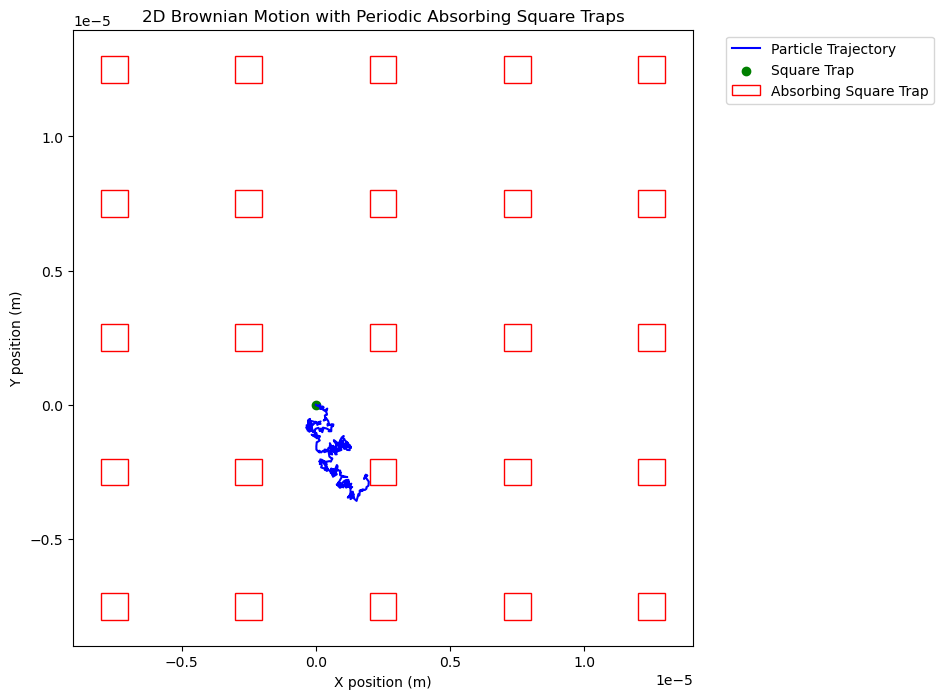

In [147]:
import numpy as np
import matplotlib.pyplot as plt

class BrownianMotionWithPeriodicAbsorbingSquareTraps:
    def __init__(self, viscosity, temperature, particle_radius, trap_size, trap_spacing, grid_size):
        # Initialize parameters
        self.viscosity = viscosity
        self.temperature = temperature
        self.particle_radius = particle_radius
        self.trap_size = trap_size
        self.trap_spacing = trap_spacing
        self.grid_size = grid_size
        
        # Boltzmann constant
        k_B = 1.38e-23
        
        # Calculate the diffusion coefficient using the Stokes-Einstein relation
        self.diffusion_coeff = k_B * temperature / (6 * np.pi * viscosity * particle_radius)
    
    def is_in_trap(self, x, y):
        # Check if the particle is within any of the periodic square traps
        # Calculate the grid position of the particle
        grid_x = int(x // self.trap_spacing)
        grid_y = int(y // self.trap_spacing)
        
        # Calculate the center of the current grid's trap
        center_x = grid_x * self.trap_spacing + self.trap_spacing / 2
        center_y = grid_y * self.trap_spacing + self.trap_spacing / 2
        
        # Check if the particle is within the trap centered at (center_x, center_y)
        if (center_x - self.trap_size / 2 <= x <= center_x + self.trap_size / 2 and
            center_y - self.trap_size / 2 <= y <= center_y + self.trap_size / 2):
            return True
        
        return False
    
    def simulate_motion(self, n_steps=10000, dt=0.01):
        # Initialize the particle's position
        x, y = 0, 0  # Starting position
        
        # Initialize lists to store positions
        x_positions = [x]
        y_positions = [y]
        
        # Simulation loop
        for _ in range(n_steps):
            # Generate random displacements along x and y axes
            x_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            y_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff * dt))
            
            # Update positions
            x += x_step
            y += y_step
            
            # Check if the particle enters any of the periodic square traps
            if self.is_in_trap(x, y):
                # If the particle enters a trap, stop the simulation
                break
            
            # Store the new positions
            x_positions.append(x)
            y_positions.append(y)
        
        # Return the positions
        return x_positions, y_positions

# Parameters for the simulation
viscosity = 0.001  # Viscosity in Pa.s (e.g., water)
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters
trap_size = 1e-6  # Size of square trap in meters
trap_spacing = 5e-6  # Spacing between traps in meters
grid_size = 2  # Size of the grid in terms of the number of traps
dt = 0.01  # Time step in seconds
n_steps = 1000  # Number of steps in the simulation

# Create an instance of the BrownianMotionWithPeriodicAbsorbingSquareTraps class
brownian_sim = BrownianMotionWithPeriodicAbsorbingSquareTraps(viscosity, temperature, particle_radius, trap_size, trap_spacing, grid_size)

# Simulate the motion of the particle
x_positions, y_positions = brownian_sim.simulate_motion(n_steps, dt)

# Plot the particle's trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, color='b', label='Particle Trajectory')
plt.scatter(0, 0, color='g', marker='o', label='Starting Point')

# Plot each square trap in the periodic grid
for grid_x in range(-grid_size, grid_size + 1):
    for grid_y in range(-grid_size, grid_size + 1):
        # Calculate the center of the trap
        center_x = grid_x * trap_spacing + trap_spacing / 2
        center_y = grid_y * trap_spacing + trap_spacing / 2
        # Plot the square trap as a red rectangle
        plt.gca().add_patch(plt.Rectangle((center_x - trap_size / 2, center_y - trap_size / 2), trap_size, trap_size, edgecolor='r', fill=False, label='Absorbing Square Trap'))

plt.title('2D Brownian Motion with Periodic Absorbing Square Traps')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.legend()
plt.axis('equal')

# Position the legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))
plt.legend(labels=['Particle Trajectory', 'Square Trap', 'Absorbing Square Trap'], loc='upper right', bbox_to_anchor=(1.4, 1.0))


plt.show()


Problem 1: 

Particle absorbed at position (0, -3)


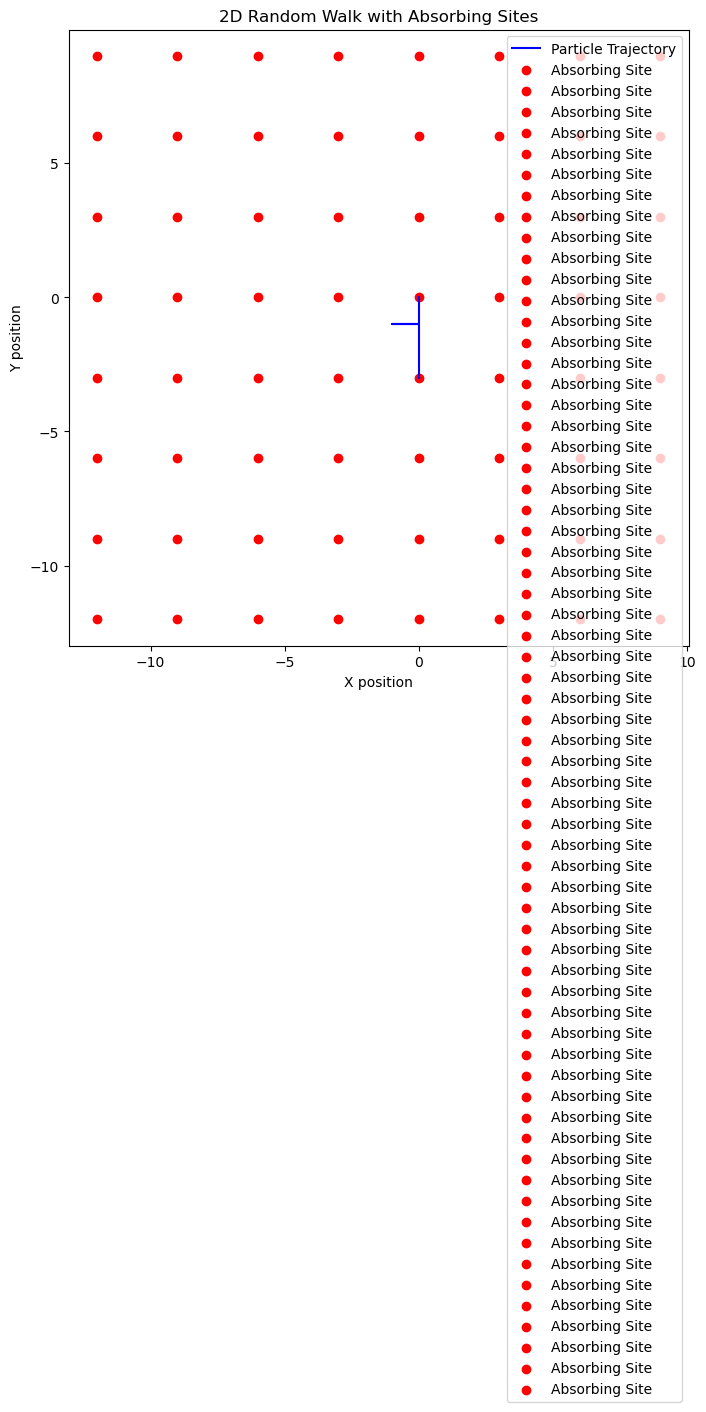

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Define the simulation function
def random_walk_with_absorbing_sites(n_steps):
    # Initialize the particle's starting position at the origin
    x, y = 0, 0
    
    # Store the positions of the particle
    x_positions = [x]
    y_positions = [y]
    
    # Define absorbing sites located every 3 steps in each direction
    absorb_sites = set()
    for i in range(-n_steps // 3, n_steps // 3 + 1):
        for j in range(-n_steps // 3, n_steps // 3 + 1):
            absorb_sites.add((i * 3, j * 3))
    
    # Perform the random walk
    for _ in range(n_steps):
        # Choose a random direction for the particle to move
        direction = np.random.choice(['up', 'down', 'left', 'right'])
        
        # Update the particle's position based on the chosen direction
        if direction == 'up':
            y += 1
        elif direction == 'down':
            y -= 1
        elif direction == 'left':
            x -= 1
        elif direction == 'right':
            x += 1
        
        # Store the updated position
        x_positions.append(x)
        y_positions.append(y)
        
        # Check if the particle lands on an absorbing site
        if (x, y) in absorb_sites:
            print(f"Particle absorbed at position ({x}, {y})")
            break
    
    return x_positions, y_positions

# Number of steps in the simulation
n_steps = 10

# Run the simulation and get the particle's trajectory
x_positions, y_positions = random_walk_with_absorbing_sites(n_steps)

# Plot the particle's trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, color='b', label='Particle Trajectory')

# Plot absorbing sites as red dots
for i in range(-n_steps // 3, n_steps // 3 + 1):
    for j in range(-n_steps // 3, n_steps // 3 + 1):
        plt.scatter(i * 3, j * 3, color='r', marker='o', label='Absorbing Site')

# Customize the plot
plt.title('2D Random Walk with Absorbing Sites')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()
